In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries and download dataset from kaggle

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import files
# files.upload()  #this will prompt you to upload the kaggle.json


In [ ]:

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission


In [ ]:

# !kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany -p '/content/drive/MyDrive/germany rental offer/'

In [ ]:
# !unzip '/content/drive/MyDrive/germany rental offer/apartment-rental-offers-in-germany.zip' -d '/content/drive/MyDrive/germany rental offer/'

In [24]:
dataset = pd.read_csv('/content/drive/MyDrive/germany rental offer/immo_data.csv')

In [5]:
dataset

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


# Data preprocessing



## Find categorical data
## Drop columns full of null values
## Drop categorical columns with too many category

In [ ]:
one_hot = []
for i in dataset.columns:
  print(i)
  print('null :', dataset[i].isna().sum())

  if all(isinstance(x, int) or isinstance(x, float) for x in dataset[i]):
    print('number')
    if dataset[i].isna().sum() > 50000:
      dataset.drop([i], inplace=True, axis=1)
      print('DROP null value')
      continue
    print('unique :', len(np.unique(dataset[i].astype(str))))
    if len(np.unique(dataset[i].astype(str))) <= 5:
      print('categorical int')
  else:
    print('string')
    if dataset[i].isna().sum() > 150000:
      dataset.drop([i], inplace=True, axis=1)
      print('DROP null value')
      continue
    print('unique :', len(np.unique(dataset[i].astype(str))))
    if len(np.unique(dataset[i].astype(str))) <= 20:
      print('categorical string')
      one_hot.append(i)
    else:
      dataset.drop([i], inplace=True, axis=1)
      print('DROP too many cartegory')
  print("-----")


regio1
null : 0
string
unique : 16
categorical string
-----
serviceCharge
null : 6909
number
unique : 12267
-----
heatingType
null : 44856
string
unique : 14
categorical string
-----
telekomTvOffer
null : 32619
string
unique : 4
categorical string
-----
telekomHybridUploadSpeed
null : 223830
number
DROP null value
newlyConst
null : 0
number
unique : 2
categorical int
-----
balcony
null : 0
number
unique : 2
categorical int
-----
picturecount
null : 0
number
unique : 95
-----
pricetrend
null : 1832
number
unique : 1235
-----
telekomUploadSpeed
null : 33358
number
unique : 8
-----
totalRent
null : 40517
number
unique : 28487
-----
yearConstructed
null : 57045
number
DROP null value
scoutId
null : 0
number
unique : 268850
-----
noParkSpaces
null : 175798
number
DROP null value
firingTypes
null : 56964
string
unique : 133
DROP too many cartegory
-----
hasKitchen
null : 0
number
unique : 2
categorical int
-----
geo_bln
null : 0
string
unique : 16
categorical string
-----
cellar
null : 0
num

In [ ]:
print(dataset.shape)
print(one_hot)
dataset

(268850, 28)
['regio1', 'heatingType', 'telekomTvOffer', 'geo_bln', 'condition', 'interiorQual', 'petsAllowed', 'typeOfFlat', 'date']


,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,scoutId,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,noRoomsRange,garden,livingSpaceRange,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,96107057,False,Nordrhein_Westfalen,True,595.0,86.00,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,4,True,4,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,111378734,False,Rheinland_Pfalz,False,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,3,False,4,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,113147523,False,Sachsen,True,965.0,83.80,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,3,False,4,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,108890903,False,Sachsen,False,343.0,58.15,NaN,NaN,NaN,False,2,other,9599,3.0,3,False,2,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,114751222,False,Bremen,False,765.0,84.97,refurbished,NaN,NaN,False,5,apartment,28213,3.0,3,False,4,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,115641081,False,Bayern,True,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,3,False,4,Feb20
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,96981497,True,Hessen,False,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,3,False,5,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,66924271,False,Hessen,True,650.0,95.00,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,4,True,4,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,110938302,False,Nordrhein_Westfalen,True,840.0,70.00,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,2,False,3,May19


## Drop useless columns

In [ ]:
# show that geo_bln and regio1 column has no diffrence 
for i in range(len(dataset['geo_bln'])):
  if dataset['geo_bln'][i] != dataset['regio1'][i]:
    print('diff')

In [ ]:
dataset.drop(['geo_bln', 'scoutId', 'picturecount', 'date'], inplace=True, axis=1)
one_hot.remove('geo_bln')
one_hot.remove('date')

## One hot encoding categorical columns

In [ ]:
dataset2 = dataset
for i in one_hot:
  y = pd.get_dummies(dataset2[i], prefix=i)
  dataset2 = dataset2.join(y)
  dataset2.drop([i], inplace=True, axis=1)
dataset2

,serviceCharge,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,cellar,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,noRoomsRange,garden,livingSpaceRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,245.00,False,False,4.62,10.0,840.0,False,True,595.0,86.00,False,4,44269,4.0,4,True,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,134.00,False,True,3.47,10.0,NaN,False,False,800.0,89.00,False,5,67459,3.0,3,False,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,255.00,True,True,2.72,2.4,1300.0,False,True,965.0,83.80,True,6,1097,3.0,3,False,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,58.15,False,True,1.53,40.0,NaN,False,False,343.0,58.15,False,2,9599,3.0,3,False,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,138.00,False,True,2.46,NaN,903.0,False,False,765.0,84.97,False,5,28213,3.0,3,False,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,90.00,False,True,2.74,10.0,910.0,False,True,820.0,90.00,False,6,82390,3.0,3,False,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
268846,220.00,False,True,6.49,NaN,1150.0,True,False,930.0,115.00,False,6,68519,3.5,3,False,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
268847,220.00,False,True,2.90,40.0,930.0,False,True,650.0,95.00,False,5,65552,4.0,4,True,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
268848,175.00,True,True,4.39,NaN,1015.0,False,True,840.0,70.00,True,6,51069,2.0,2,False,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0


## fill nummeric null values with mean of column

In [ ]:
for i in dataset2.columns:
  print(dataset2[i].isna().sum(), end=' ')
print()
values = {}
values['serviceCharge'] = dataset2['serviceCharge'].mean()
values['pricetrend'] = dataset2['pricetrend'].mean()
values['totalRent'] = dataset2['totalRent'].mean()
dataset2 = dataset2.fillna(value=values)
dataset2.drop(['telekomUploadSpeed'], inplace=True, axis=1)
for i in dataset2.columns:
  print(dataset2[i].isna().sum(), end=' ')
print()


6909 0 0 1832 33358 40517 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 


## MinMax scaling data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dataset3 = dataset2
sc = MinMaxScaler()

dataset3[dataset3.columns] = sc.fit_transform(dataset3[dataset3.columns])
dataset3.to_csv('/content/drive/MyDrive/germany rental offer/clean_data.csv')

# Correlation Matrix

In [ ]:
corr = dataset2.corr()
corr.style.background_gradient().set_precision(4)


# Linear Regression

In [ ]:
class LinearRegression:

  def __init__(self, learning_rate, epochs):
    self.learning_rate = learning_rate
    self.epochs = epochs

  def gradient(self, X, y):
    return 2/X.shape[0] * np.dot(X.T, (np.dot(X, self.weights) - y))

  def fit(self, X, y):
    train = []
    for i in range(len(X)):

      x = list(X[i])
      x.insert(0, 1)
      train.append(np.array(x))
    train = np.array(train)
    print(train.shape)
    self.weights = np.random.rand((train.shape[1]))
    for i in range(self.epochs):
      print("epoch ", i)
      print(self.weights)
      self.weights = self.weights - self.learning_rate * self.gradient(train, y)

  def predict(self, X):
    pred = []
    for i in range(len(X)):
      x = list(X[i])
      x.insert(0, 1)
      pred.append(np.array(x))
    return np.dot(pred, self.weights)



## Choose livindSpaceRange

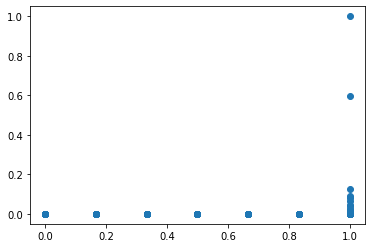

In [ ]:
x = dataset3['livingSpaceRange']
y = dataset3['livingSpace']

import matplotlib.pyplot as plt

plt.scatter(x, y)


## Remove noise data

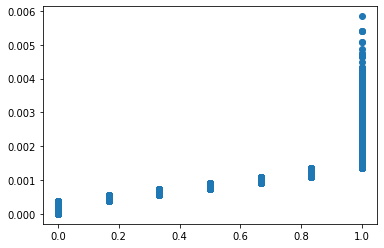

In [ ]:
for i in range(len(dataset3)):
  if y[i] > 0.008:
    y = y.drop([i])
    x = x.drop([i])
plt.scatter(x, y)

## Choose serviceCharge

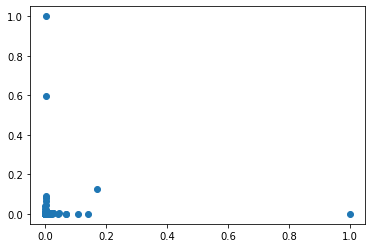

In [ ]:
x2 = dataset3['serviceCharge']
y2 = dataset3['livingSpace']

import matplotlib.pyplot as plt

plt.scatter(x2, y2)

## Remove noise data

In [ ]:
for i in range(len(dataset3)):
  if y2[i] > 0.006:
    y2 = y2.drop([i])
    x2 = x2.drop([i])
  elif x2[i] > 0.0125:
    y2 = y2.drop([i])
    x2 = x2.drop([i])

268812


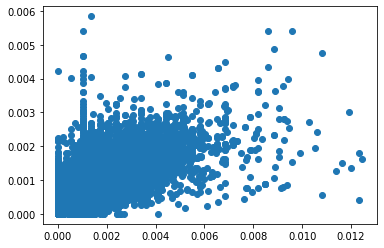

In [ ]:
print(len(x2))
plt.scatter(x2, y2)

## splite train and validation

In [ ]:
xtrain = np.array([x[:200000]]).T
xval = np.array([x[200000:]]).T
ytrain = np.array(y[:200000])
yval = np.array(y[200000:])
print(xtrain.shape)
print(ytrain.shape)

(200000, 1)
(200000,)


## livingSpaceRange regression (one variable)

In [ ]:
lr = LinearRegression(5e-2, 1000)

lr.fit(xtrain, ytrain)


(200000, 2)
epoch  0
[0.96548505 0.91584348]
epoch  1
[0.83750242 0.86681153]
epoch  2
[0.72400449 0.82303025]
epoch  3
[0.6233622  0.78391055]
epoch  4
[0.53412964 0.74892959]
epoch  5
[0.4550235  0.71762329]
epoch  6
[0.38490475 0.68957973]
epoch  7
[0.32276242 0.66443333]
epoch  8
[0.26769922 0.64185958]
epoch  9
[0.21891876 0.62157047]
epoch  10
[0.17571418 0.60331036]
epoch  11
[0.13745811 0.58685234]
epoch  12
[0.10359372 0.57199502]
epoch  13
[0.07362678 0.55855964]
epoch  14
[0.04711863 0.54638753]
epoch  15
[0.02367996 0.53533787]
epoch  16
[0.00296521 0.52528564]
epoch  17
[-0.01533233  0.51611989]
epoch  18
[-0.03148486  0.50774215]
epoch  19
[-0.04573399  0.50006499]
epoch  20
[-0.05829415  0.49301081]
epoch  21
[-0.06935567  0.48651075]
epoch  22
[-0.07908747  0.48050366]
epoch  23
[-0.08763948  0.47493528]
epoch  24
[-0.09514477  0.46975743]
epoch  25
[-0.10172143  0.46492736]
epoch  26
[-0.1074743   0.46040709]
epoch  27
[-0.11249641  0.45616295]
epoch  28
[-0.11687034  

In [ ]:
ypred = lr.predict(xval)

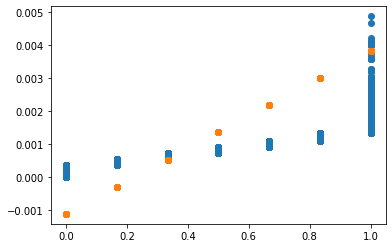

In [ ]:
plt.scatter(xval, yval)
plt.scatter(xval, ypred)

## plite train and validation

In [ ]:
xtrain2 = np.array([x2[:200000]]).T
xval2 = np.array([x2[200000:]]).T
ytrain2 = np.array(y2[:200000])
yval2 = np.array(y2[200000:])
print(xtrain2.shape)
print(ytrain2.shape)

(200000, 1)
(200000,)


In [ ]:
lr = LinearRegression(5e-2, 1000)

lr.fit(xtrain2, ytrain2)


(200000, 2)
epoch  0
[0.59312581 0.88770733]
epoch  1
[0.53378828 0.88764652]
epoch  2
[0.4803845  0.88759179]
epoch  3
[0.43232111 0.88754253]
epoch  4
[0.38906407 0.88749819]
epoch  5
[0.35013273 0.88745828]
epoch  6
[0.31509453 0.88742237]
epoch  7
[0.28356015 0.88739004]
epoch  8
[0.25517922 0.88736094]
epoch  9
[0.22963638 0.88733476]
epoch  10
[0.20664783 0.88731118]
epoch  11
[0.18595814 0.88728997]
epoch  12
[0.16733741 0.88727087]
epoch  13
[0.15057876 0.88725368]
epoch  14
[0.13549598 0.88723821]
epoch  15
[0.12192148 0.88722429]
epoch  16
[0.10970443 0.88721175]
epoch  17
[0.09870909 0.88720047]
epoch  18
[0.08881328 0.88719031]
epoch  19
[0.07990705 0.88718117]
epoch  20
[0.07189145 0.88717293]
epoch  21
[0.06467741 0.88716553]
epoch  22
[0.05818477 0.88715885]
epoch  23
[0.0523414  0.88715285]
epoch  24
[0.04708236 0.88714744]
epoch  25
[0.04234923 0.88714257]
epoch  26
[0.03808941 0.88713819]
epoch  27
[0.03425558 0.88713424]
epoch  28
[0.03080513 0.88713069]
epoch  29
[0

In [ ]:
ypred2 = lr.predict(xval2)

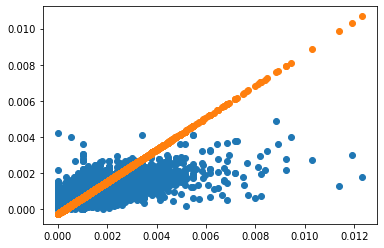

In [ ]:
plt.scatter(xval2, yval2)
plt.scatter(xval2, ypred2)

# Multiple variable linear regression

## Splite x y and validation

In [ ]:
Y = dataset3['livingSpace']
X = dataset3.drop(['livingSpace'], axis=1)


In [ ]:
x_train = np.array(X[:200000])
x_val = np.array(X[200000:])
y_train = np.array(Y[:200000])
y_val = np.array(Y[200000:])
print(x_train.shape)
print(y_train.shape)

(200000, 74)
(200000,)


## Regression with all features

In [ ]:
lr = LinearRegression(5e-2, 1000)
lr.fit(x_train, y_train)


Streaming output truncated to the last 5000 lines.
 -0.00116293 -0.01176423  0.34560808  0.01205461 -0.17958668 -0.12919934
  0.36141992 -0.04100978 -0.02618606  0.15651507  0.51755368  0.54805205
  0.43321155  0.46062936  0.50913692  0.32401438  0.4991297   0.37356447
  0.43051758  0.45320164  0.48843309  0.63659328  0.41029129  0.40996935
  0.50461993  0.43476334  0.07253341  0.28001058  0.07187812  0.72326365
  0.08337496  0.07952393  0.18184812  0.58387552  0.15911998  0.08879128
  0.80742586  0.5677678   0.22447772  0.00611266  0.01305802  0.04859787
  0.03433263  0.08417175  0.05710428  0.06400067  0.07115345  0.10141737
  0.45143865  0.07243514  0.05341985  0.04581773  0.04167185 -0.03448617
  0.2250247  -0.03278205 -0.03075276 -0.02909836 -0.00411778  0.09470213
  0.10197409  0.24080686  0.60258988  0.10621532  0.14993611  0.10724006
  0.25524212  0.09659019  0.3097781 ]
epoch  738
[-0.60859376  0.32134512  0.03141541  0.00177107  0.06856428  0.0402667
 -0.00115357 -0.01174556 

In [ ]:
y_pred = lr.predict(x_val)

# Mean square error

In [ ]:
from sklearn.metrics import mean_squared_error

print('livingSpaceRange error:', mean_squared_error(yval, ypred))
print('serviceCharge error:', mean_squared_error(yval2, ypred2))
print('all featurs error:', mean_squared_error(y_val, y_pred))

livingSpaceRange error: 8.034440152495776e-07
serviceCharge error: 1.4750093131127175e-07
all featurs error: 0.009151280895229664


# Calculate accuracy 

In [ ]:
def calculate_accuracy(pred, val):

  right = 0
  for i in range(len(pred)):
    if abs(pred[i] - val[i]) <= val[i] / 10:
      right += 1
  return right / len(pred)

In [ ]:
print(calculate_accuracy(ypred, yval))
print(calculate_accuracy(ypred2, yval2))
print(calculate_accuracy(y_pred, y_val))


0.1031131513575548
0.17422833226762774
0.0010167029774872912


# Linear Regression Version 2
### built-in accuracy loss and history

In [ ]:
from sklearn.metrics import mean_squared_error

class LinearRegressionV2:

  def __init__(self, learning_rate=0.1, epochs=100, accuracy_rate=0.1):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.accuracy_rate = accuracy_rate
    self.history = {'loss': [], 'accuracy': []}

  def gradient(self, X, y):
    return 2/X.shape[0] * np.dot(X.T, (np.dot(X, self.weights) - y))

  def fit(self, X, y, Xval, yval):
    train = []
    for i in range(len(X)):

      x = list(X[i])
      x.insert(0, 1)
      train.append(np.array(x))
    train = np.array(train)
    self.weights = np.random.rand((train.shape[1]))
    for i in range(self.epochs + 1):
      print("epoch ", i)
      pred = self.predict(Xval)
      err = mean_squared_error(yval, pred)
      acc = calculate_accuracy(pred, yval)
      print("mse:", err)
      print("accuracy:", acc)
      self.history['loss'].append(err)
      self.history['accuracy'].append(acc)
      self.weights = self.weights - self.learning_rate * self.gradient(train, y)

  def predict(self, X):
    pred = []
    for i in range(len(X)):
      x = list(X[i])
      x.insert(0, 1)
      pred.append(np.array(x))
    return np.dot(pred, self.weights)

  def calculate_accuracy(pred, val):
    right = 0
    for i in range(len(pred)):
      if abs(pred[i] - val[i]) <= val[i] * self.accuracy_rate:
        right += 1
    return right / len(pred)


## All features regression with "linear regression v2" 

In [ ]:
lr = LinearRegressionV2()
lr.fit(x_train, y_train, x_val, y_val)

epoch  0
mse: 48.07449781854171
accuracy: 0.0
epoch  1
mse: 0.8579829167510388
accuracy: 8.714596949891067e-05
epoch  2
mse: 0.7355155867541817
accuracy: 1.4524328249818447e-05
epoch  3
mse: 0.6828395046192602
accuracy: 7.262164124909223e-05
epoch  4
mse: 0.6357273684609008
accuracy: 0.00010167029774872912
epoch  5
mse: 0.5934662666796239
accuracy: 8.714596949891067e-05
epoch  6
mse: 0.5554686491176833
accuracy: 4.3572984749455335e-05
epoch  7
mse: 0.5212241053779932
accuracy: 0.00010167029774872912
epoch  8
mse: 0.4902899037953222
accuracy: 0.00011619462599854757
epoch  9
mse: 0.4622813304035075
accuracy: 8.714596949891067e-05
epoch  10
mse: 0.4368634447528561
accuracy: 7.262164124909223e-05
epoch  11
mse: 0.413744088642613
accuracy: 7.262164124909223e-05
epoch  12
mse: 0.39266794817745954
accuracy: 7.262164124909223e-05
epoch  13
mse: 0.37341150079392205
accuracy: 0.00011619462599854757
epoch  14
mse: 0.35577870705067827
accuracy: 8.714596949891067e-05
epoch  15
mse: 0.33959733032073

## Draw plots using history

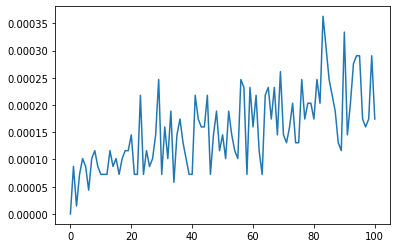

In [ ]:
plt.plot(lr.history['accuracy'])

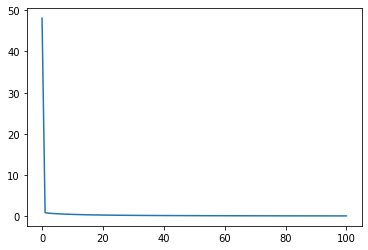

In [ ]:
plt.plot(lr.history['loss'])

# Sci-Kit-learn linear regression




In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(new_x_train, new_y_train)

In [ ]:
pred_sk = reg.predict(new_x_val)

In [ ]:
mean_squared_error(pred_sk, new_y_val)

5.114677963524074e-07

In [ ]:
calculate_accuracy(new_y_val, pred_sk)

0.254960058097313

# Multi Process

In [6]:
def preprocesss(dataset):
  one_hot = []
  for i in dataset.columns:
    print(i)
    print('null :', dataset[i].isna().sum())

    if all(isinstance(x, int) or isinstance(x, float) for x in dataset[i]):
      print('number')
      if dataset[i].isna().sum() > 50000:
        dataset.drop([i], inplace=True, axis=1)
        print('DROP null value')
        continue
      print('unique :', len(np.unique(dataset[i].astype(str))))
      if len(np.unique(dataset[i].astype(str))) <= 5:
        print('categorical int')
    else:
      print('string')
      if dataset[i].isna().sum() > 150000:
        dataset.drop([i], inplace=True, axis=1)
        print('DROP null value')
        continue
      print('unique :', len(np.unique(dataset[i].astype(str))))
      if len(np.unique(dataset[i].astype(str))) <= 20:
        print('categorical string')
        one_hot.append(i)
      else:
        dataset.drop([i], inplace=True, axis=1)
        print('DROP too many cartegory')
    print("-----")
  dataset.drop(['geo_bln', 'scoutId', 'picturecount', 'date'], inplace=True, axis=1)
  one_hot.remove('geo_bln')
  one_hot.remove('date')
  dataset2 = dataset
  for i in one_hot:
    y = pd.get_dummies(dataset2[i], prefix=i)
    dataset2 = dataset2.join(y)
    dataset2.drop([i], inplace=True, axis=1)
  dataset2
  for i in dataset2.columns:
    print(dataset2[i].isna().sum(), end=' ')
  print()
  values = {}
  values['serviceCharge'] = dataset2['serviceCharge'].mean()
  values['pricetrend'] = dataset2['pricetrend'].mean()
  values['totalRent'] = dataset2['totalRent'].mean()
  dataset2 = dataset2.fillna(value=values)
  dataset2.drop(['telekomUploadSpeed'], inplace=True, axis=1)
  for i in dataset2.columns:
    print(dataset2[i].isna().sum(), end=' ')
  print()
  from sklearn.preprocessing import MinMaxScaler

  dataset3 = dataset2
  sc = MinMaxScaler()

  dataset3[dataset3.columns] = sc.fit_transform(dataset3[dataset3.columns])

  return dataset3

In [7]:
dataset = preprocesss(dataset)

regio1
null : 0
string
unique : 16
categorical string
-----
serviceCharge
null : 6909
number
unique : 12267
-----
heatingType
null : 44856
string
unique : 14
categorical string
-----
telekomTvOffer
null : 32619
string
unique : 4
categorical string
-----
telekomHybridUploadSpeed
null : 223830
number
DROP null value
newlyConst
null : 0
number
unique : 2
categorical int
-----
balcony
null : 0
number
unique : 2
categorical int
-----
picturecount
null : 0
number
unique : 95
-----
pricetrend
null : 1832
number
unique : 1235
-----
telekomUploadSpeed
null : 33358
number
unique : 8
-----
totalRent
null : 40517
number
unique : 28487
-----
yearConstructed
null : 57045
number
DROP null value
scoutId
null : 0
number
unique : 268850
-----
noParkSpaces
null : 175798
number
DROP null value
firingTypes
null : 56964
string
unique : 133
DROP too many cartegory
-----
hasKitchen
null : 0
number
unique : 2
categorical int
-----
geo_bln
null : 0
string
unique : 16
categorical string
-----
cellar
null : 0
num

In [8]:
from multiprocessing import Pool, cpu_count
cpu_count()

2

In [15]:
import time

s_time = time.time()
with Pool(cpu_count()) as p:
    p.imap(preprocesss, dataset)
print(f'run time : {time.time() - s_time}')

run time : 0.14083409309387207


# Dask

In [16]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 136 kB 12.9 MB/s 
     |████████████████████████████████| 837 kB 32.6 MB/s 
     |████████████████████████████████| 830 kB 34.8 MB/s 
     |████████████████████████████████| 822 kB 35.0 MB/s 
     |████████████████████████████████| 802 kB 35.2 MB/s 
     |████████████████████████████████| 802 kB 35.6 MB/s 
     |████████████████████████████████| 793 kB 34.8 MB/s 
     |████████████████████████████████| 793 kB 34.2 MB/s 
     |████████████████████████████████| 791 kB 35.0 MB/s 
     |████████████████████████████████| 786 kB 23.9 MB/s 
     |████████████████████████████████| 779 kB 37.8 MB/s 
     |████████████████████████████████| 778 kB 25.9 MB/s 
     |████████████████████████████████| 776 kB 36.5 MB/s 
     |████████████████████████████████| 769 kB 38.1 MB/s 
     |████████████████████████████████| 766 kB 47.4 MB/s 
     |████████████████████████████████| 1.0 MB 33.5 MB/s 
     |████████████████████████████████| 722 kB 20.8 MB/s 
     |████████

In [17]:
import dask
import dask.dataframe as dd

In [25]:
ddf = dd.from_pandas(dataset, npartitions=2)

In [26]:
dpdf = ddf.compute()
type(dpdf)

pandas.core.frame.DataFrame

In [29]:
s_time = time.time()
ddf_edit = ddf.apply(preprocesss, axis=1)
print(f'run time : {time.time() - s_time}')

ValueError: ignored

# Pyspark

In [31]:
import os, sys
sys.executable

'/usr/bin/python3'

In [32]:
os.environ["PYSPARK_PYTHON"] = sys.executable

In [33]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 48.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=16db9b5ab5087dcaedabbe5311f59cf4cb08f3ca508534bd837b19e284356819
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [34]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .getOrCreate()

In [35]:
sdf=spark.createDataFrame(dataset)

TypeError: ignored